In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# create a data generator
datagen = ImageDataGenerator(
        samplewise_center=True,  # set each sample mean to 0
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,# flip vertically
        validation_split=0.2) 

In [6]:
train=datagen.flow_from_directory(  "dataframe",  
                                    target_size=(224, 224), 
                                    color_mode='rgb',
                                    shuffle=True,
                                    seed=42,
                                    class_mode='categorical', 
                                    batch_size=32,
                                    subset="training"
)
validation=datagen.flow_from_directory(  "dataframe",  
                                    target_size=(224, 224), 
                                    shuffle=True,
                                    seed=42,
                                    color_mode='rgb', 
                                    class_mode='categorical', 
                                    batch_size=32,
                                    subset='validation'
)

Found 3045 images belonging to 4 classes.
Found 759 images belonging to 4 classes.


In [7]:
class_names = list(train.class_indices.keys())
class_names

['computers', 'imprimante', 'smartphone', 'tablette']

In [8]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58900480/58889256 [==============================] - 42s 1us/step


In [9]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
base_model.trainable = False#freezing
inputs = keras.Input(shape=(224, 224, 3))
# Separately from setting trainable on the model, we set training to False 
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = Dense(4, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [11]:
model.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [13]:
history = model.fit(
    train,
    validation_data=validation,
    epochs=50,
    callbacks=my_callbacks,
    verbose=1
)

Epoch 1/50
 2/96 [..............................] - ETA: 6:09 - loss: 2.6759 - accuracy: 0.4219

C:\Users\PC\anaconda3\lib\site-packages\PIL\Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


96/96 [==============================] - 645s 7s/step - loss: 1.2187 - accuracy: 0.7422 - val_loss: 0.7287 - val_accuracy: 0.8248
Epoch 2/50
96/96 [==============================] - 648s 7s/step - loss: 0.6285 - accuracy: 0.8407 - val_loss: 0.6469 - val_accuracy: 0.8314
Epoch 3/50
96/96 [==============================] - 651s 7s/step - loss: 0.5033 - accuracy: 0.8627 - val_loss: 0.5327 - val_accuracy: 0.8630
Epoch 4/50
96/96 [==============================] - 658s 7s/step - loss: 0.4138 - accuracy: 0.8755 - val_loss: 0.4479 - val_accuracy: 0.8722
Epoch 5/50
96/96 [==============================] - 651s 7s/step - loss: 0.3655 - accuracy: 0.8916 - val_loss: 0.4751 - val_accuracy: 0.8867
Epoch 6/50
96/96 [==============================] - 647s 7s/step - loss: 0.3297 - accuracy: 0.8985 - val_loss: 0.4402 - val_accuracy: 0.8748
Epoch 7/50
96/96 [==============================] - 649s 7s/step - loss: 0.2938 - accuracy: 0.9041 - val_loss: 0.3807 - val_accuracy: 0.9012
Epoch 8/50
96/96 [======

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.imagenet_utils import preprocess_input

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

def make_predictions(image_path):
    show_image(image_path)
    image = image_utils.load_img(image_path, target_size=(224, 224))
    image = image_utils.img_to_array(image)
    image = image.reshape(1,224,224,3)
    image = preprocess_input(image)
    preds = model.predict(image)
    return preds

'computers'

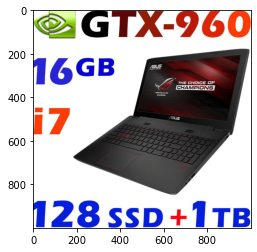

In [15]:
class_names[np.argmax(make_predictions("dataframe/computers/00093070c55fdce4b0eae99e885b1739.jpg"))]

In [16]:
test=datagen.flow_from_directory(  "test",  
                                    target_size=(224, 224), 
                                    color_mode='rgb',
                                    seed=42,
                                    class_mode='categorical'
)

Found 10 images belonging to 4 classes.


'computers'

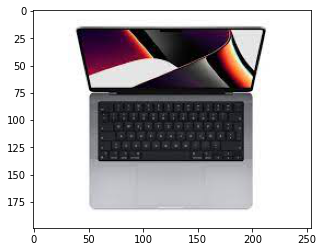

In [24]:
class_names[np.argmax(make_predictions("test/computers/téléchargé.jpg"))]

'imprimante'

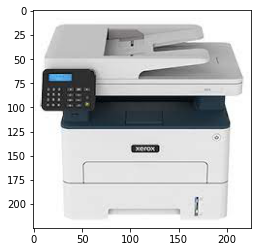

In [23]:
class_names[np.argmax(make_predictions("test/imprimante/téléchargé (1).jpg"))]